# Installation

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Loading

In [2]:
data = pd.read_csv('NSE-Tata-Chem.csv')
dataset_train=data.iloc[0:930,1:2]
dataset_test=data.iloc[930:,1:2]
training_set = data.iloc[0:930, 3:4].values
testing_set=data.iloc[930:,3:4].values
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Cr)
0,2024-06-12,1110.90,1135.00,1097.00,1123.60,1111.40,93150,403.688819
1,2024-06-11,1081.10,1120.95,1073.40,1111.40,1086.00,95841,381.099581
2,2024-06-10,1064.95,1097.70,1060.00,1086.00,1056.15,66806,266.159937
3,2024-06-07,1028.90,1061.60,1017.95,1056.15,1063.35,65954,258.761442
4,2024-06-06,1046.95,1067.00,1045.00,1063.35,1043.10,32991,90.913203


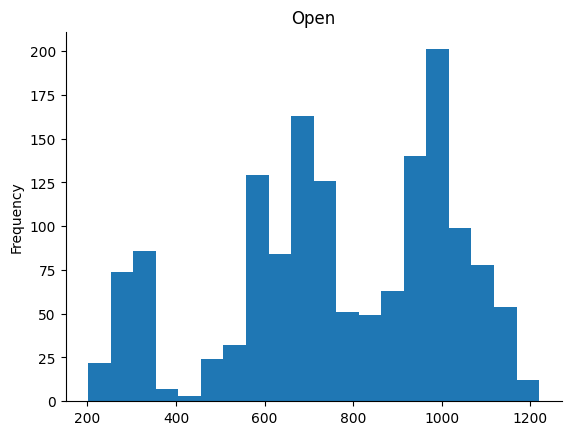

In [3]:
# @title Open

from matplotlib import pyplot as plt
data['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
data.drop('Last', axis=1, inplace=True)
data.drop('Total Trade Quantity', axis=1, inplace=True)
data.drop('Turnover (Cr)', axis=1, inplace=True)
print(data.head())
data.to_csv('tata_preprocessed.csv',index= False)
data = data.iloc[::-1]

         Date     Open     High      Low    Close
0  2024-06-12  1110.90  1135.00  1097.00  1111.40
1  2024-06-11  1081.10  1120.95  1073.40  1086.00
2  2024-06-10  1064.95  1097.70  1060.00  1056.15
3  2024-06-07  1028.90  1061.60  1017.95  1063.35
4  2024-06-06  1046.95  1067.00  1045.00  1043.10


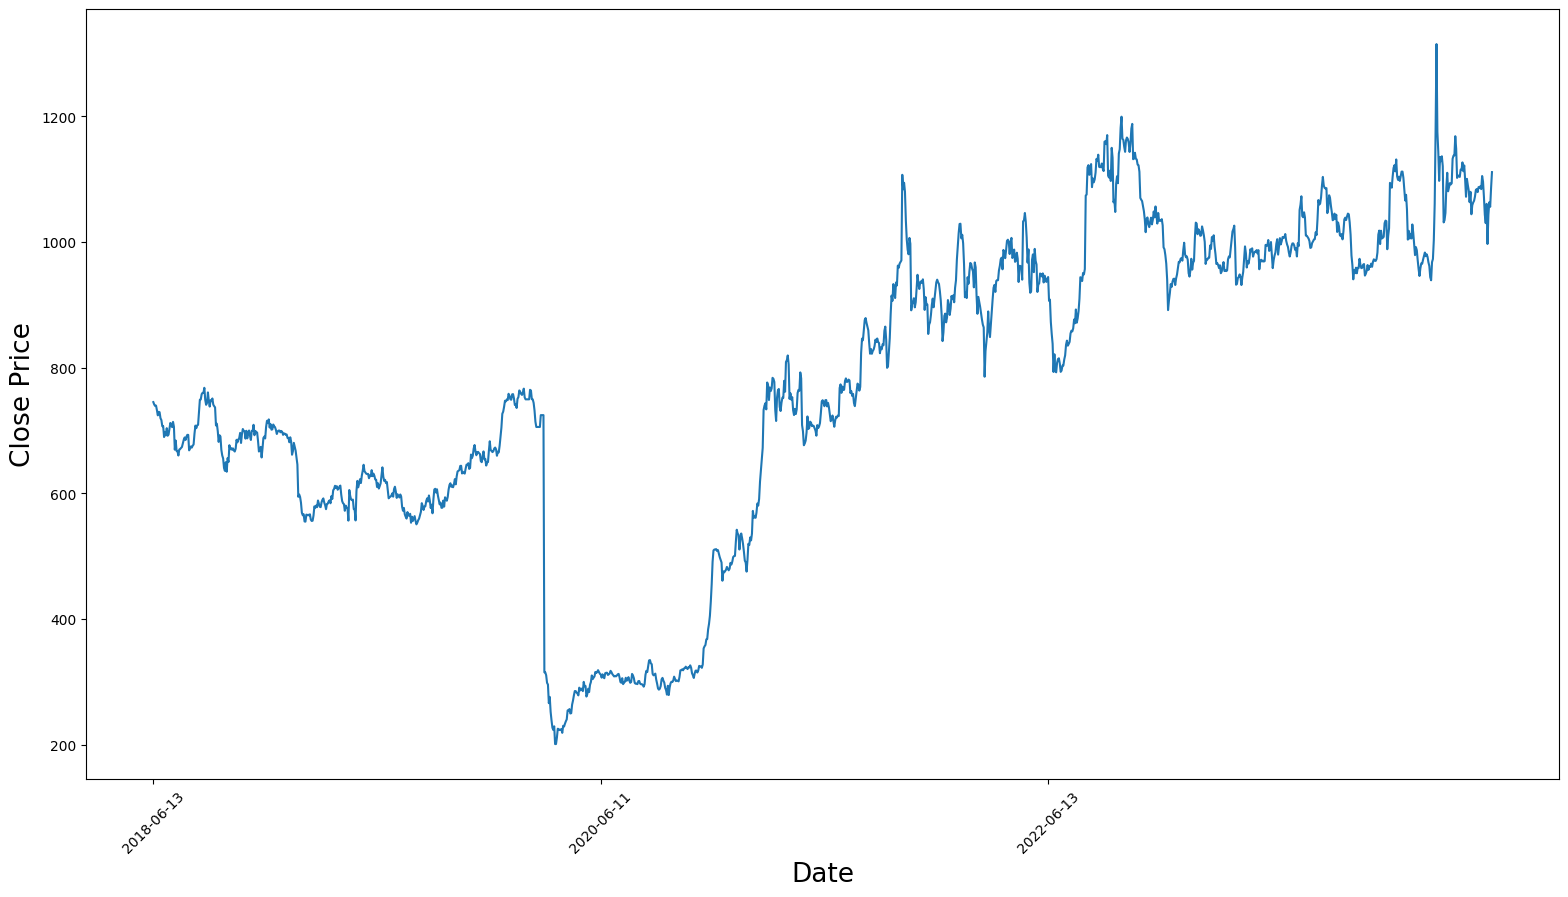

In [5]:
plt.figure(figsize = (19,10))
plt.plot(range(data.shape[0]),(data['Close']))
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=19)
plt.ylabel('Close Price',fontsize=19)
plt.show()

# Pre-Processing

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
len(training_set_scaled)
X_train = []
y_train = []
for i in range(10,930):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Prediction Using Deep Learning

In [7]:
regressor = Sequential()

regressor.add(LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 55, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 55, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 80))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 200, batch_size = 128)

Epoch 1/200
8/8 [==============================] - 9s 70ms/step - loss: 0.3083
Epoch 2/200
8/8 [==============================] - 1s 82ms/step - loss: 0.0461
Epoch 3/200
8/8 [==============================] - 1s 72ms/step - loss: 0.0366
Epoch 4/200
8/8 [==============================] - 1s 69ms/step - loss: 0.0217
Epoch 5/200
8/8 [==============================] - 1s 69ms/step - loss: 0.0157
Epoch 6/200
8/8 [==============================] - 1s 73ms/step - loss: 0.0129
Epoch 7/200
8/8 [==============================] - 1s 128ms/step - loss: 0.0110
Epoch 8/200
8/8 [==============================] - 1s 123ms/step - loss: 0.0091
Epoch 9/200
8/8 [==============================] - 1s 128ms/step - loss: 0.0083
Epoch 10/200
8/8 [==============================] - 1s 119ms/step - loss: 0.0072
Epoch 11/200
8/8 [==============================] - 1s 68ms/step - loss: 0.0066
Epoch 12/200
8/8 [==============================] - 1s 69ms/step - loss: 0.0063
Epoch 13/200
8/8 [===========================

In [8]:
real_stock_price = testing_set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10,568):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

18/18 [==============================] - 2s 10ms/step


# Testing

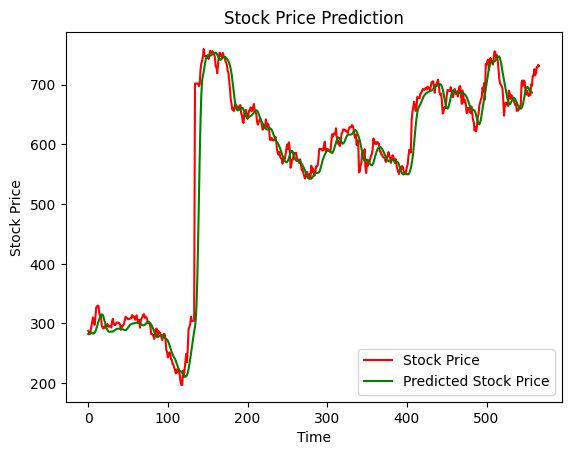

In [9]:
plt.plot(real_stock_price, color = 'red', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [10]:
print(f"Shape of inputs array: {inputs.shape}")
print(f"Length of dataset_total DataFrame: {len(dataset_total)}")
print(f"Length of dataset_test DataFrame: {len(dataset_test)}")

Shape of inputs array: (577, 1)
Length of dataset_total DataFrame: 1497
Length of dataset_test DataFrame: 567


# **Predict Regression**

In [11]:
dataset = pd.read_csv('NSE-Tata-Chem.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 6)

In [13]:
print(X_test)

[[  1080.     1084.     1042.     1044.3    1080.    32673.  ]
 [  1004.     1008.1     981.15    985.95   1003.25  29470.  ]
 [   750.      755.      731.75    743.45    739.5  138627.  ]
 ...
 [   293.      299.      285.      286.05    290.55  30539.  ]
 [   961.      962.      903.35    912.15    965.    54169.  ]
 [   993.95   1020.      993.95   1006.25    993.95  47722.  ]]


In [14]:
print(X_train)

[[  833.65   840.     832.     834.4    829.   30617.  ]
 [ 1057.    1065.    1032.2   1063.    1058.65 25759.  ]
 [  972.65   978.95   964.     965.85   969.95 23783.  ]
 ...
 [  987.4    990.5    971.4    977.     983.45 30320.  ]
 [  748.6    748.6    729.65   738.75   743.6  32998.  ]
 [  315.8    321.     314.8    319.65   318.45 25425.  ]]


In [15]:
y_train = y_train.reshape(len(y_train),1)

In [16]:
print(y_train)

[[129.682574 ]
 [ 62.8174438]
 [ 82.0067664]
 ...
 [ 89.2752479]
 [127.7515993]
 [ 71.452828 ]]


In [17]:
y_test = y_test.reshape(len(y_test),1)

In [18]:
print(y_test)

[[  66.0825903]
 [  95.0123666]
 [ 647.1117064]
 [  26.760954 ]
 [  43.8480052]
 [ 156.9036069]
 [  56.3373782]
 [ 398.7782031]
 [  72.1163458]
 [  85.9499871]
 [  37.4409858]
 [  51.9448486]
 [ 119.6675395]
 [  37.0899672]
 [  13.3077599]
 [  53.6059534]
 [  79.4932565]
 [  38.0369104]
 [  98.4853393]
 [ 112.1986441]
 [  17.1077701]
 [  51.1661413]
 [  26.4300092]
 [  38.985311 ]
 [ 409.295386 ]
 [ 155.5654149]
 [  17.3893977]
 [  67.4840267]
 [  26.9237976]
 [ 223.9074845]
 [ 300.4959964]
 [  58.7022775]
 [ 311.3907724]
 [ 301.1814326]
 [  77.7220651]
 [ 520.749932 ]
 [  65.8390368]
 [  24.5738736]
 [  19.1574558]
 [  41.0110513]
 [ 102.2837873]
 [ 144.4787081]
 [  40.7323555]
 [  29.8221505]
 [ 527.788108 ]
 [  23.2791682]
 [  44.4648207]
 [ 315.346847 ]
 [  93.2504721]
 [  20.7913615]
 [ 413.6770985]
 [ 159.346869 ]
 [  22.2900372]
 [  54.8206087]
 [ 581.8718087]
 [  32.4473874]
 [ 310.0411838]
 [  24.7423064]
 [  16.7265736]
 [ 269.2403312]
 [ 137.531341 ]
 [  29.7937801]
 [ 229.7

In [20]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

<ipython-input-20-28f68d7399a7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [21]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[  91.07   66.08]
 [  98.8    95.01]
 [ 623.95  647.11]
 [  46.64   26.76]
 [  42.68   43.85]
 [ 168.25  156.9 ]
 [  59.76   56.34]
 [ 340.85  398.78]
 [  79.74   72.12]
 [  67.29   85.95]
 [  54.33   37.44]
 [  71.87   51.94]
 [  89.78  119.67]
 [  37.62   37.09]
 [  15.65   13.31]
 [  48.99   53.61]
 [  91.57   79.49]
 [  33.57   38.04]
 [ 111.93   98.49]
 [ 178.7   112.2 ]
 [  46.22   17.11]
 [  43.88   51.17]
 [  26.85   26.43]
 [ 122.17   38.99]
 [ 549.7   409.3 ]
 [ 185.31  155.57]
 [  31.1    17.39]
 [  67.94   67.48]
 [  40.71   26.92]
 [ 282.15  223.91]
 [ 291.12  300.5 ]
 [  49.52   58.7 ]
 [ 326.64  311.39]
 [ 258.2   301.18]
 [  28.37   77.72]
 [ 457.57  520.75]
 [  80.59   65.84]
 [  20.12   24.57]
 [  33.07   19.16]
 [  75.55   41.01]
 [ 103.89  102.28]
 [ 139.39  144.48]
 [  31.13   40.73]
 [  36.54   29.82]
 [ 537.81  527.79]
 [  22.44   23.28]
 [  26.61   44.46]
 [ 442.88  315.35]
 [  50.57   93.25]
 [  30.24   20.79]
 [ 361.94  413.68]
 [  88.37  159.35]
 [  18.26   

# Accuracy Of Model

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9313546739991595

# Price Prediction

In [23]:
print(regressor.predict([[1491.8,1674.3,1019.5,1432.1,1399.7,96000]]))

[1013.71]
